#  <a name="C1">Introduction</a>

Ce dataset est celui du Dr.Pete Mowforth et du Dr. Barry Shepherd de l'institut George House 36 North Hanover St. Glasgow G1 2AD.

Le but est de classifier 4 types de véhicules en fonction de plusieurs caractéristiques issues de leurs silhouettes.

Les  **18 variables explicatives** sont les suivantes :

COMPACTNESS

CIRCULARITY

DISTANCE CIRCULARITY

RADIUS RATIO

PR.AXIS ASPECT RATIO

MAX.LENGTH ASPECT RATIO

SCATTER RATIO

ELONGATEDNESS

PR.AXIS RECTANGULARITY

MAX.LENGTH RECTANGULARITY

SCALED VARIANCE ALONG MAJOR AXIS

SCALED VARIANCE ALONG MINOR AXIS

SCALED RADIUS OF GYRATION 

SKEWNESS ABOUT MAJOR AXIS

SKEWNESS ABOUT MINOR AXIS

KURTOSIS ABOUT MINOR AXIS

KURTOSIS ABOUT MAJOR AXIS

HOLLOWS RATIO

Les **4 variables à expliquer** sont :

Une camionnette (van)

Un bus (bus)

Une voiture de type Opel

une voiture de type Saab

In [21]:
import os
os.chdir("C:/Users/Diaby DRAME/Desktop/data")

import warnings
warnings.filterwarnings("ignore")


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

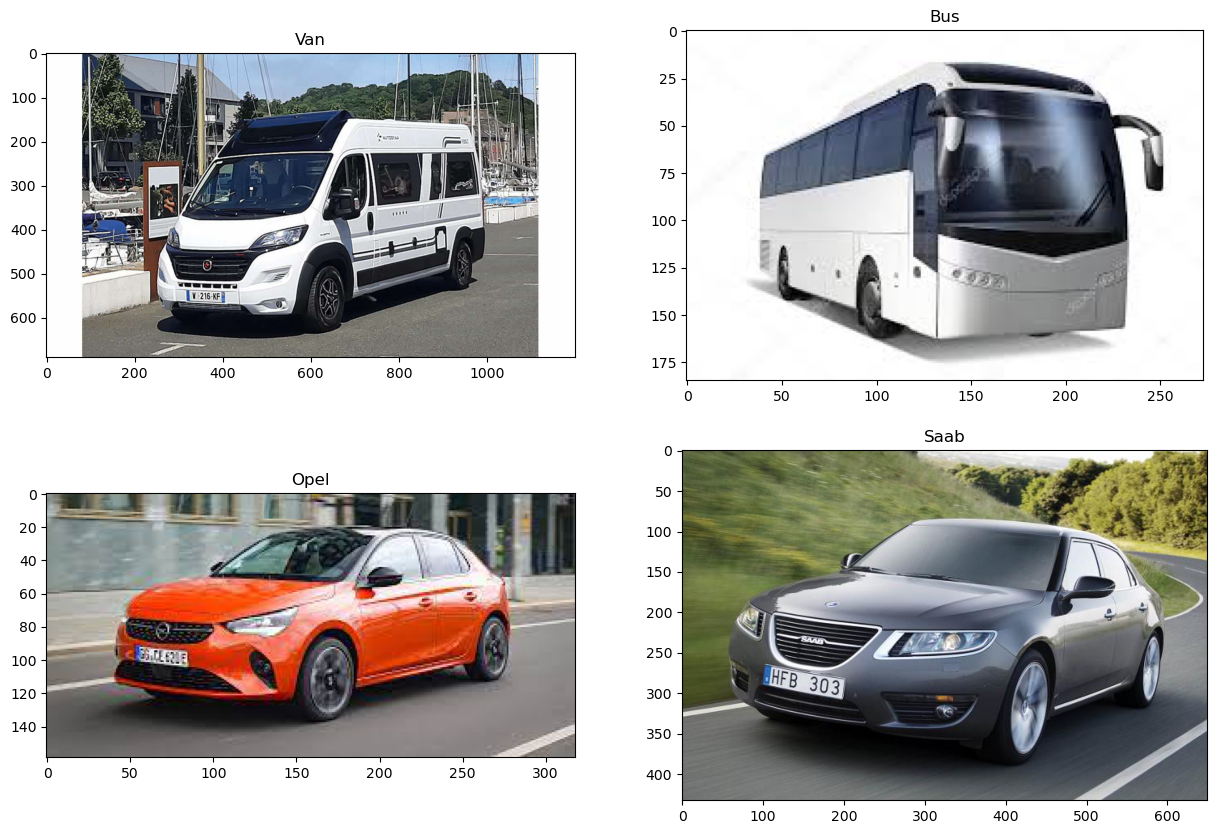

In [23]:
image1 = Image.open("Van.jpg")
image2 = Image.open("Bus.jpg")
image3 = Image.open("Opel.jpg")
image4 = Image.open("Saab.jpg")

image = [image1,image2,image3,image4]
fig, ax = plt.subplots(2,2,figsize = (15,10))
ax[0,0].imshow(image[0])
ax[0,1].imshow(image[1])
ax[1,0].imshow(image[2])
ax[1,1].imshow(image[3])
ax[0,0].set_title("Van")
ax[0,1].set_title("Bus")
ax[1,0].set_title("Opel")
ax[1,1].set_title("Saab")
plt.show()


#  <a name="C1">Importation et Visualisation des données</a>

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("csv_result-dataset_54_vehicle.csv")

# 5 premières lignes
data.head()

id  COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0   1           95           48                    83           178   
1   2           91           41                    84           141   
2   3          104           50                   106           209   
3   4           93           41                    82           159   
4   5           85           44                    70           205   

   PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72                       10            162   
1                    57                        9            149   
2                    66                       10            207   
3                    63                        9            144   
4                   103                       52            149   

   ELONGATEDNESS  PR.AXIS_RECTANGULARITY  MAX.LENGTH_RECTANGULARITY  \
0             42                      20                        159   
1             45                      19                        143   
2             32                      23                        158   
3             46                      19                        143   
4             45                      19                        144   

   SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  SCALED_RADIUS_OF_GYRATION  \
0                    176                    379                        184   
1                    170                    330                        158   
2                    223                    635                        220   
3                    160                    309                        127   
4                    241                    325                        188   

   SKEWNESS_ABOUT_MAJOR  SKEWNESS_ABOUT_MINOR  KURTOSIS_ABOUT_MAJOR  \
0                    70                     6                    16   
1                    72                     9                    14   
2                    73                    14                     9   
3                    63                     6                    10   
4                   127                     9                    11   

   KURTOSIS_ABOUT_MINOR  HOLLOWS_RATIO Class  
0                   187            197   van  
1                   189            199   van  
2                   188            196  saab  
3                   199            207   van  
4                   180            183   bus

In [6]:
# La taille
data.shape

(846, 20)

On vérifie qu'il n' y a pas d'erreur de type.

In [7]:
data.dtypes

id                            int64
COMPACTNESS                   int64
CIRCULARITY                   int64
DISTANCE_CIRCULARITY          int64
RADIUS_RATIO                  int64
PR.AXIS_ASPECT_RATIO          int64
MAX.LENGTH_ASPECT_RATIO       int64
SCATTER_RATIO                 int64
ELONGATEDNESS                 int64
PR.AXIS_RECTANGULARITY        int64
MAX.LENGTH_RECTANGULARITY     int64
SCALED_VARIANCE_MAJOR         int64
SCALED_VARIANCE_MINOR         int64
SCALED_RADIUS_OF_GYRATION     int64
SKEWNESS_ABOUT_MAJOR          int64
SKEWNESS_ABOUT_MINOR          int64
KURTOSIS_ABOUT_MAJOR          int64
KURTOSIS_ABOUT_MINOR          int64
HOLLOWS_RATIO                 int64
Class                        object
dtype: object

On vérifie qu'il n' y a pas de valeur manquante.

In [8]:
#liste des valeurs manquantes
data.isnull().sum() 

id                           0
COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

On a donc pas de valeurs manquantes dans le dataset.

<AxesSubplot:xlabel='Class'>

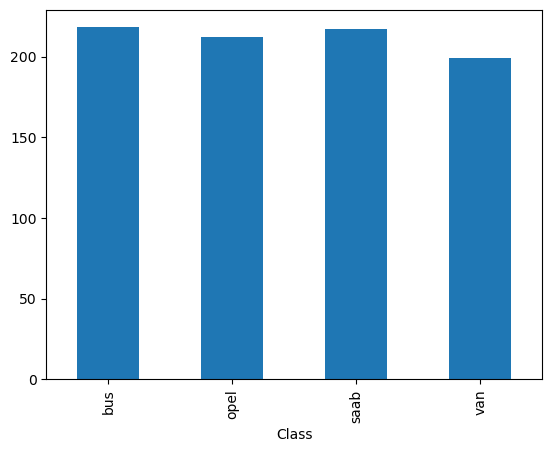

In [9]:
d = data.groupby('Class')['id'].count()

d.plot.bar()

On remarque que l'on a approximativement le même nombre pour chaque type de véhicule de notre dataset.

Soit exactement :

In [10]:
data['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

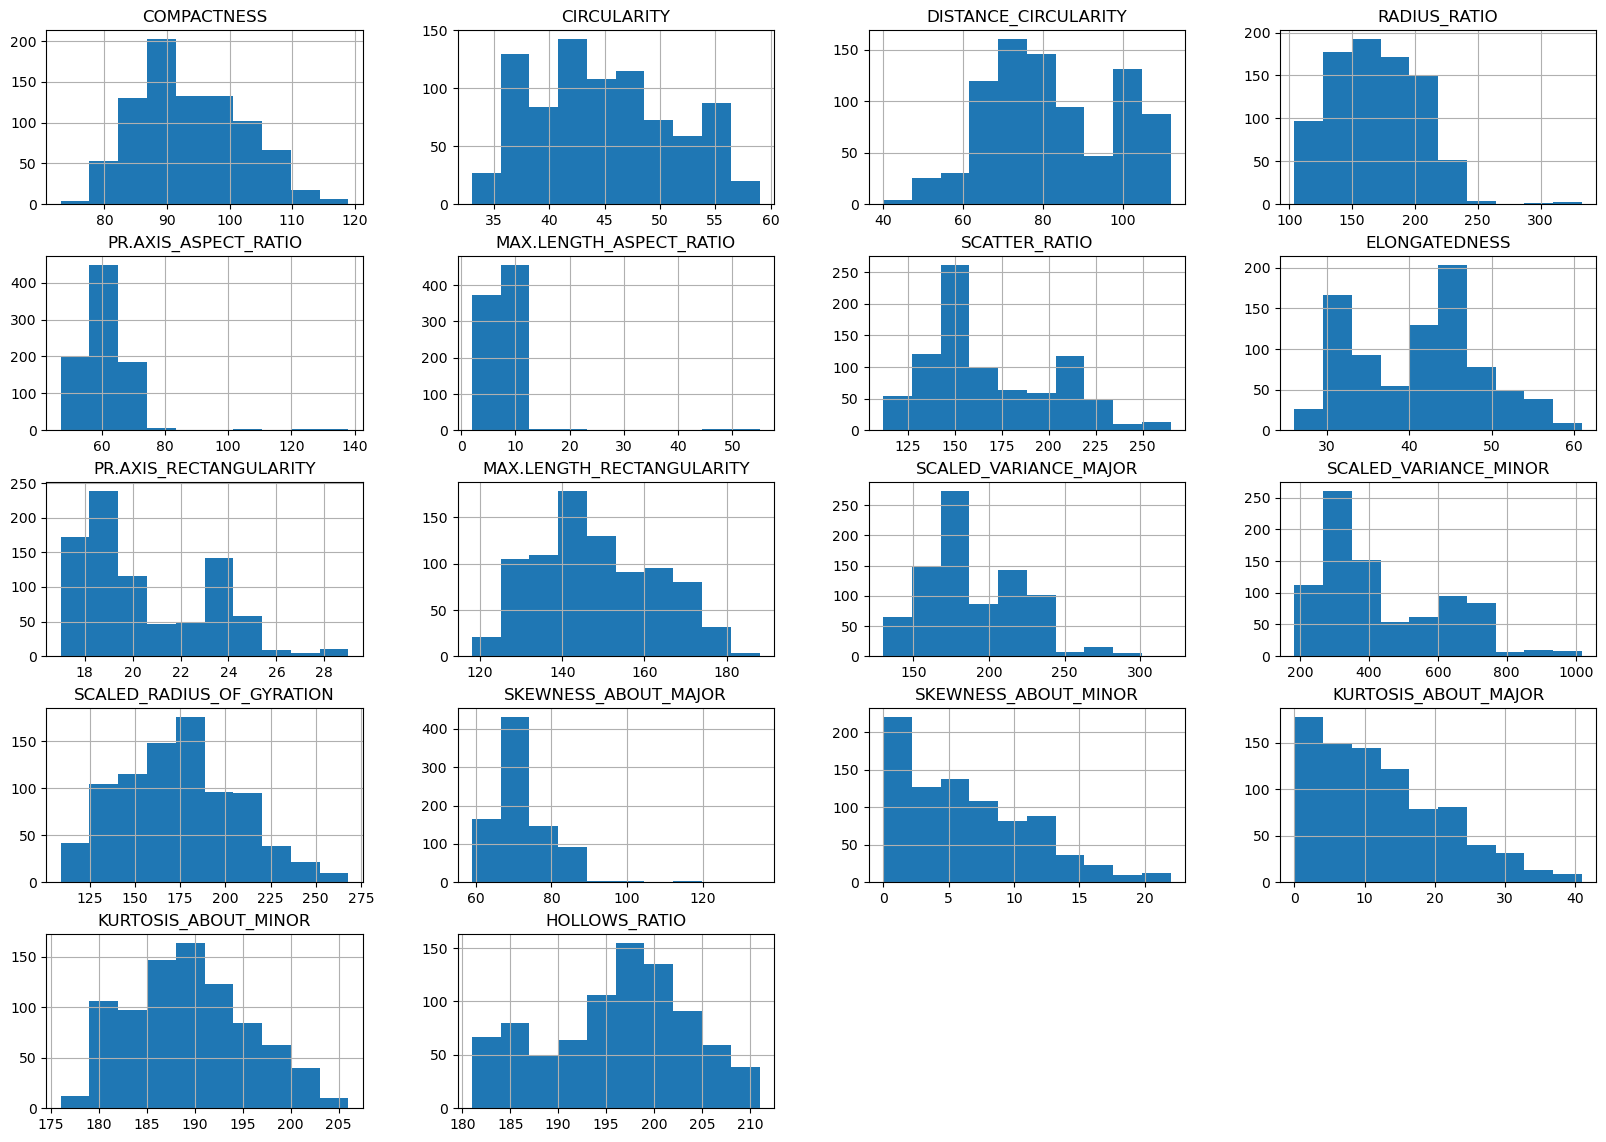

In [11]:
_ = data.loc[:, 'COMPACTNESS':].hist(figsize=(20, 14)) #histogramme des variables explicatives

On remarque que chaque variable prend ses valeurs dans des ensembles différents. 

On tiendra compte de normaliser toutes les variables (les ramener à la même échelle) avant d'entraîner un modèle.

On selectionne les 8 variables explicatives ayant le plus grand score de dépendance avec la variable à expliquer.

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selection = SelectKBest(f_classif,k=8)
selection.fit(data.loc[:,'COMPACTNESS':'HOLLOWS_RATIO'],data["Class"])
selection.get_support()

array([False, False,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False])

In [12]:
X = data.loc[:,'COMPACTNESS':'HOLLOWS_RATIO']
col_names = X.columns[selection.get_support()]
col_names

Index(['DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR',
       'SCALED_VARIANCE_MINOR', 'SKEWNESS_ABOUT_MAJOR'],
      dtype='object')

Avec seaborn, on affiche les relations entre nous 8 variables selectionnées.

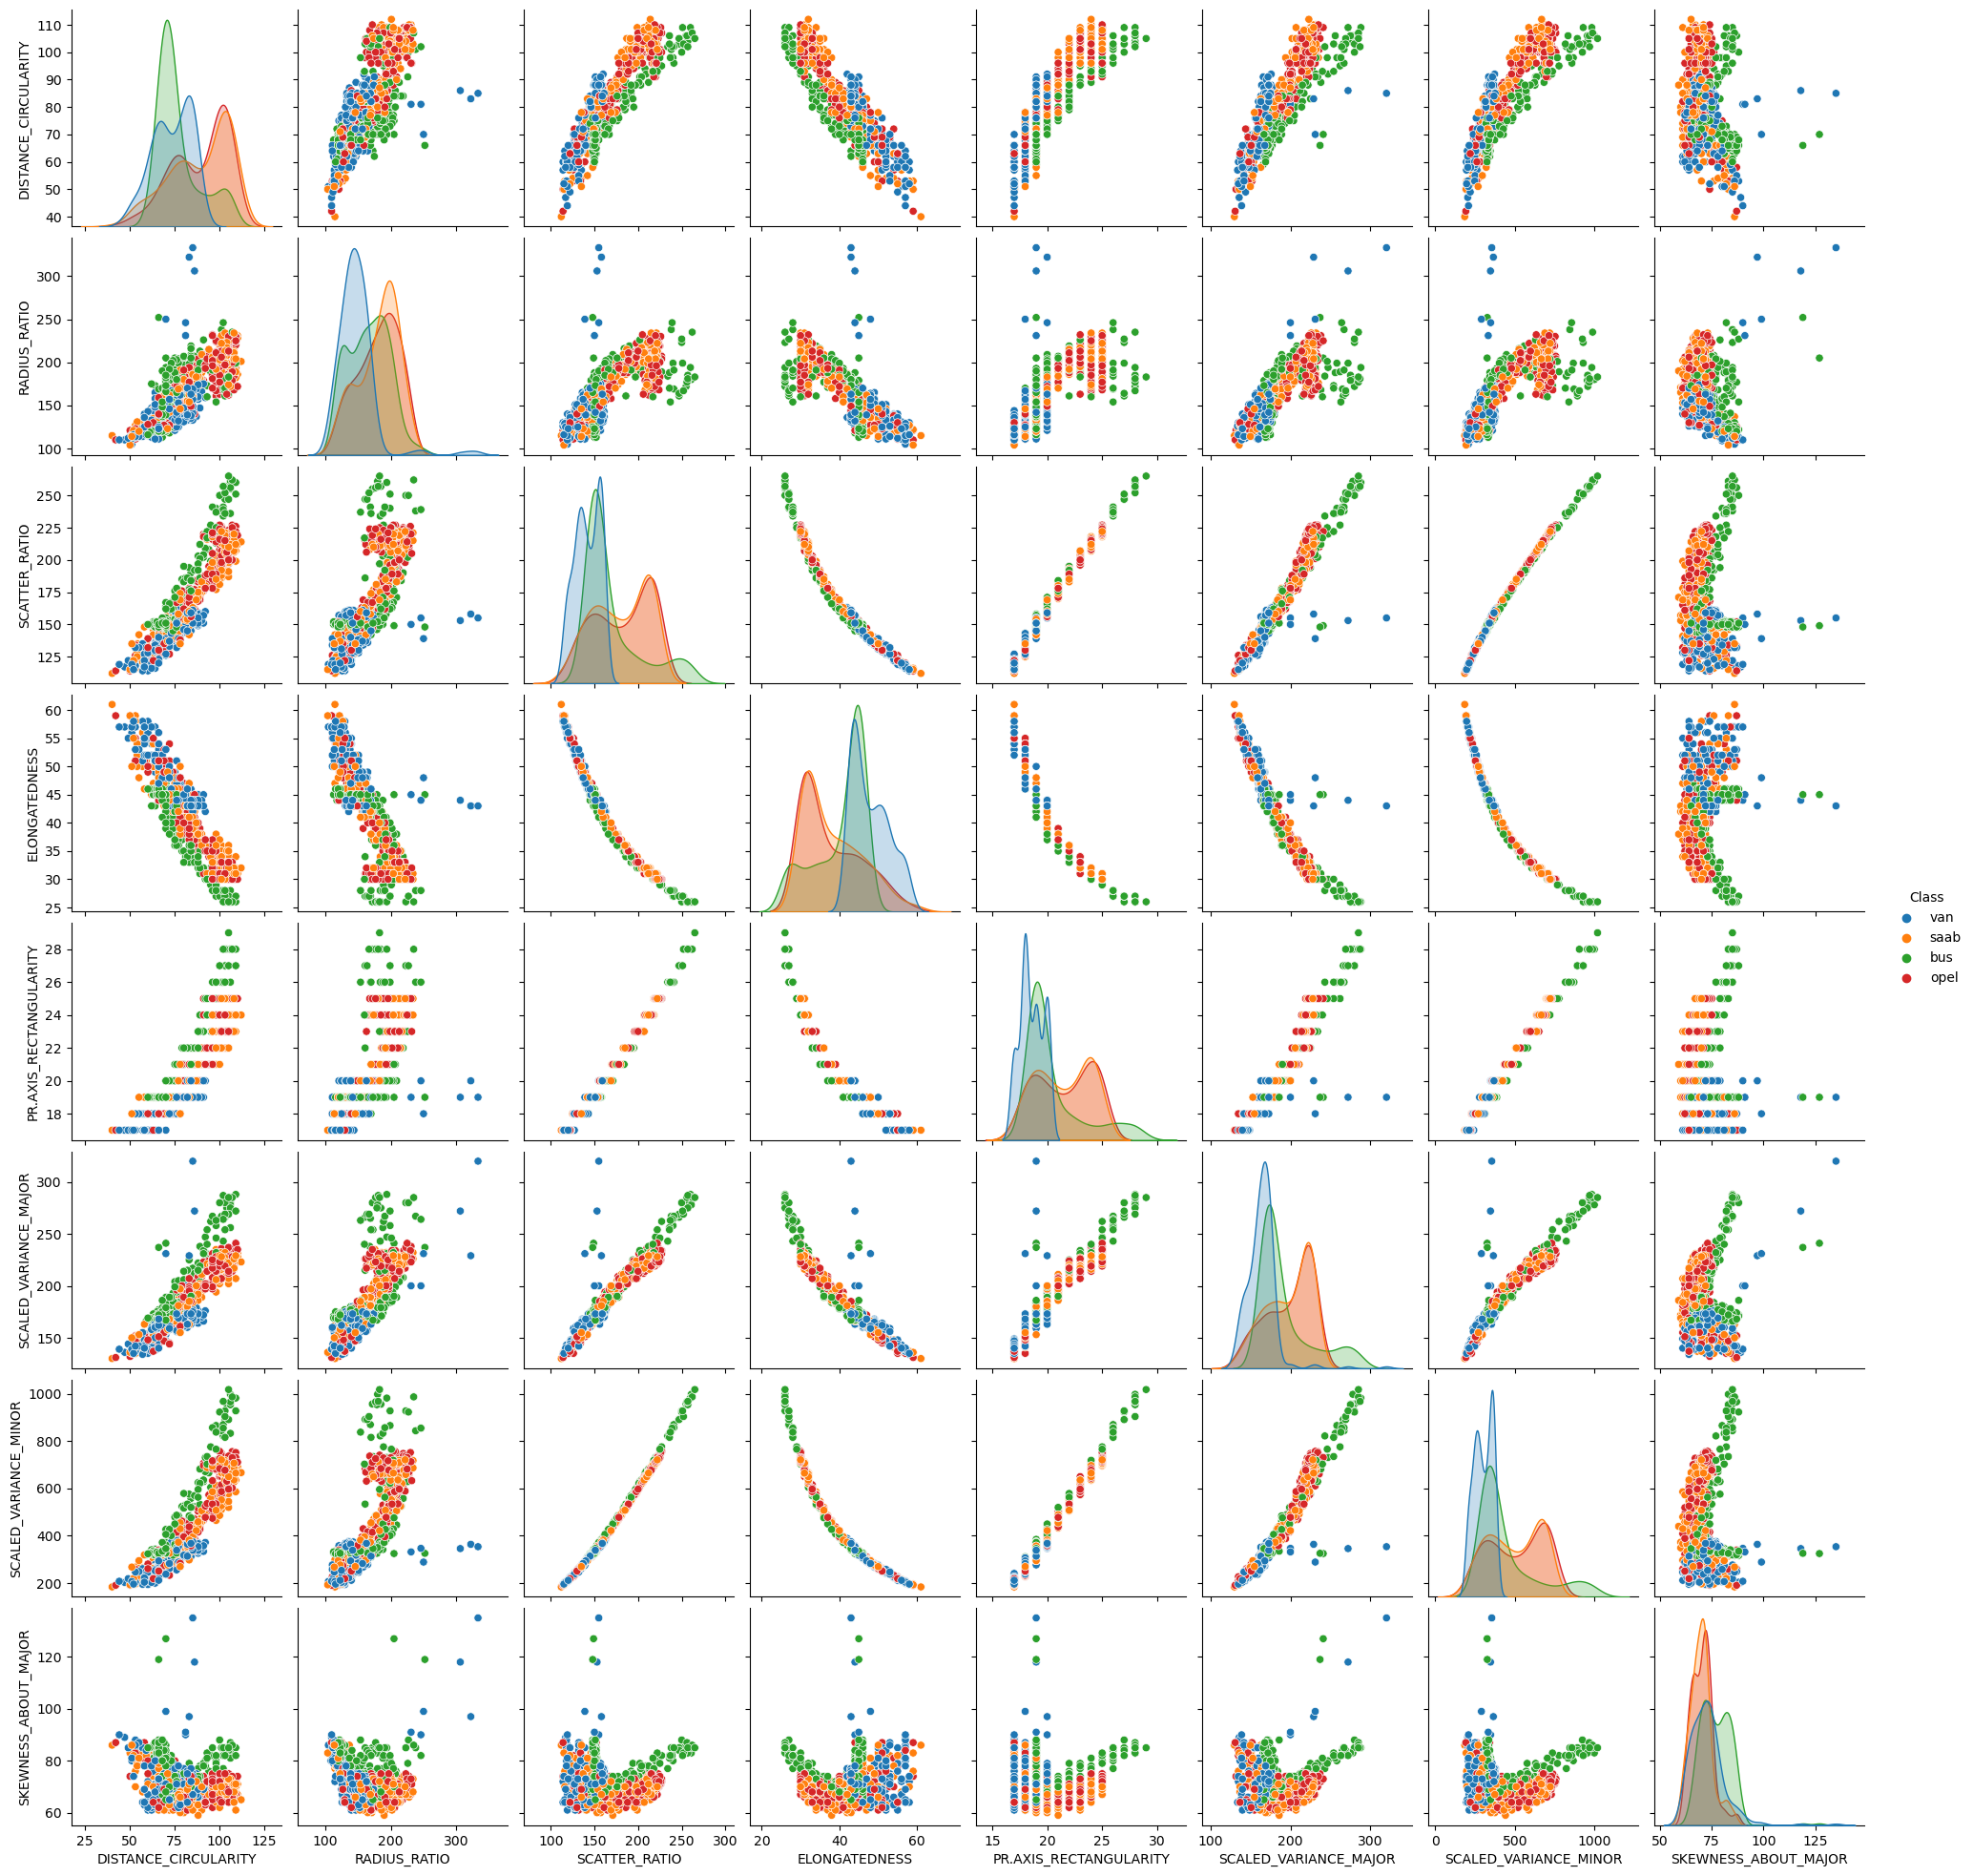

In [16]:
import seaborn as sns

_ = sns.pairplot(data, vars = ['DISTANCE_CIRCULARITY','RADIUS_RATIO', 'SCATTER_RATIO','ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR','SCALED_VARIANCE_MINOR','SKEWNESS_ABOUT_MAJOR'],
                 hue = 'Class',)

Faisons une analyse par composante principale pour visualiser nos données dans le plan.

In [25]:
from sklearn.decomposition import PCA

In [26]:
# X notre jeu de données avec les 8 variables
X = data[['DISTANCE_CIRCULARITY','RADIUS_RATIO', 'SCATTER_RATIO','ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR','SCALED_VARIANCE_MINOR','SKEWNESS_ABOUT_MAJOR']]

Proportion de variance pour les deux premières composantes principales [0.97911412 0.01587304]


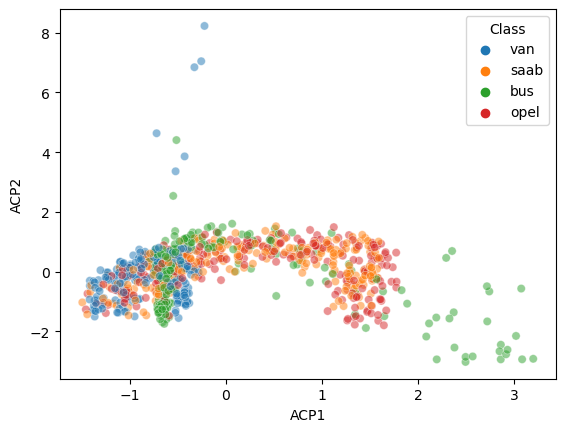

In [27]:
pca = PCA(2, whiten=True)
pca.fit(X)
print(f"Proportion de variance pour les deux premières composantes principales {pca.explained_variance_ratio_}")

r = pca.transform(X)

X['ACP1'] = r[:,0]
X['ACP2'] = r[:,1]
X['Class'] = data[['Class']]

_ = sns.scatterplot(data=X,x='ACP1',y='ACP2',hue='Class',alpha=0.5)

On remarque qu'il est très difficile d'isoler nos données selon les 4 types de classe.

#  <a name="C1">Test de modèles d'apprentissage surpervisée</a>

Séparons le dataset en deux avec d'un côté les variables explicatives et de l'autre côté les variables à expliquer.

In [133]:
target = data["Class"]
# On a considéré que les 8 variables préselectionnées ci dessus
data = data[['DISTANCE_CIRCULARITY','RADIUS_RATIO', 'SCATTER_RATIO','ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR','SCALED_VARIANCE_MINOR','SKEWNESS_ABOUT_MAJOR']]

On vérfie que tout s'est bien passé.

In [13]:
target.head()


0     van
1     van
2    saab
3     van
4     bus
Name: Class, dtype: object

In [14]:
# Cette fois ci sans la variable à prédire.
data.head()

DISTANCE_CIRCULARITY  RADIUS_RATIO  SCATTER_RATIO  ELONGATEDNESS  \
0                    83           178            162             42   
1                    84           141            149             45   
2                   106           209            207             32   
3                    82           159            144             46   
4                    70           205            149             45   

   PR.AXIS_RECTANGULARITY  SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  \
0                      20                    176                    379   
1                      19                    170                    330   
2                      23                    223                    635   
3                      19                    160                    309   
4                      19                    241                    325   

   SKEWNESS_ABOUT_MAJOR  
0                    70  
1                    72  
2                    73  
3                    63  
4                   127

On divise les données en données d'entraînement et données de test.

In [15]:
from sklearn.model_selection import train_test_split

# 80% train et 20% test
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3, random_state=0)

In [16]:
print(f"Données d'entraînement de taille {data_train.shape}")
print(f"Données de test de taille {data_test.shape}")

Données d'entraînement de taille (592, 8)
Données de test de taille (254, 8)


On normalise les variables.

In [18]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
norm.fit(data_train)
data_train = pd.DataFrame(norm.transform(data_train),columns = data_train.columns)
data_test = pd.DataFrame(norm.transform(data_test),columns = data_test.columns)

Vérification : 

In [19]:
data_train.describe()

DISTANCE_CIRCULARITY  RADIUS_RATIO  SCATTER_RATIO  ELONGATEDNESS  \
count          5.920000e+02  5.920000e+02   5.920000e+02   5.920000e+02   
mean          -3.486325e-16 -3.631667e-16  -3.673394e-16  -2.859950e-17   
std            1.000846e+00  1.000846e+00   1.000846e+00   1.000846e+00   
min           -2.425260e+00 -1.869773e+00  -1.634289e+00  -1.946699e+00   
25%           -7.524869e-01 -8.360270e-01  -6.732674e-01  -1.045747e+00   
50%           -2.377876e-01 -9.763709e-02  -3.630163e-01   2.413263e-01   
75%            9.202858e-01  7.884307e-01   8.779882e-01   6.274483e-01   
max            1.756672e+00  4.864343e+00   2.936239e+00   2.300644e+00   

       PR.AXIS_RECTANGULARITY  SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  \
count            5.920000e+02           5.920000e+02           5.920000e+02   
mean             5.733964e-17          -1.828492e-18           1.656426e-16   
std              1.000846e+00           1.000846e+00           1.000846e+00   
min             -1.369815e+00          -1.721729e+00          -1.369278e+00   
25%             -5.915709e-01          -6.700548e-01          -6.875578e-01   
50%             -3.970098e-01          -3.513656e-01          -4.214163e-01   
75%              9.649178e-01           8.915222e-01           8.224748e-01   
max              3.299651e+00           4.205890e+00           3.315950e+00   

       SKEWNESS_ABOUT_MAJOR  
count          5.920000e+02  
mean          -7.545578e-16  
std            1.000846e+00  
min           -1.808633e+00  
25%           -6.223228e-01  
50%           -9.507400e-02  
75%            4.321748e-01  
max            8.209094e+00

In [20]:
data_test.describe()

DISTANCE_CIRCULARITY  RADIUS_RATIO  SCATTER_RATIO  ELONGATEDNESS  \
count            254.000000    254.000000     254.000000     254.000000   
mean               0.084153      0.062483       0.085290      -0.081962   
std                1.045915      0.960041       1.018292       1.015620   
min               -2.682609     -1.899308      -1.694826      -1.946699   
25%               -0.752487     -0.732652      -0.605164      -1.142278   
50%               -0.044775      0.050041      -0.287345       0.112619   
75%                1.177635      0.847502       0.999062       0.498741   
max                1.949684      4.066882       2.815166       2.558058   

       PR.AXIS_RECTANGULARITY  SCALED_VARIANCE_MAJOR  SCALED_VARIANCE_MINOR  \
count              254.000000             254.000000             254.000000   
mean                 0.080967               0.063683               0.083164   
std                  1.026393               1.000311               1.017145   
min                 -1.369815              -1.849205              -1.431900   
25%                 -0.591571              -0.638186              -0.646284   
50%                 -0.202449              -0.255759              -0.358795   
75%                  0.964918               0.987129               0.988991   
max                  2.910529               2.931133               3.202093   

       SKEWNESS_ABOUT_MAJOR  
count            254.000000  
mean              -0.113756  
std                0.950688  
min               -1.676820  
25%               -0.852994  
50%               -0.226886  
75%                0.300363  
max                5.968287

## **Par Train-Test**

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

- **Naive Bayes**

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
nb_modele = GaussianNB()
nb_modele.fit(data_train,target_train)

nb_prediction = nb_modele.predict(data_test)
print(f"Score de train : {nb_modele.score(data_train,target_train)}")
print(f"Score de test : {nb_modele.score(data_test,target_test)}")

Score de train : 0.4206081081081081
Score de test : 0.4015748031496063


On remarque que le modèle est en sous-apprentissage. La courbe d'apprentissage ci-dessous nous permet d'y voir un peu clair.

On va aussi tracer la matrice de confusion pour nos données de test.

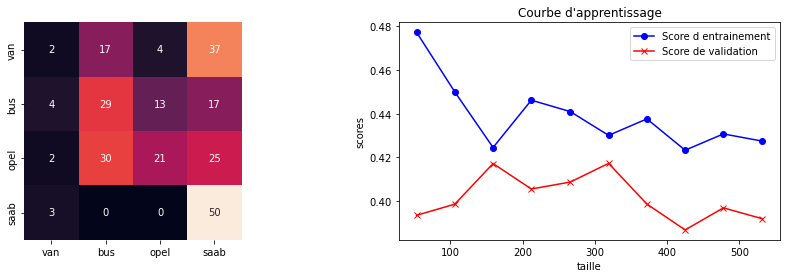

In [24]:
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.heatmap(confusion_matrix(target_test, nb_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])


n, train_scores, val_scores = learning_curve(nb_modele,data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n, train_scores.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n, val_scores.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
plt.legend()
plt.show()

Malgré un score mauvais, c'est un modèle qui classe bien les saab (seuleument 3 erreurs).

- **Méthode du plus proche voisin**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

Nous allons d'abord chercher le meilleur k qui donne des bons scores.

In [26]:
scores = []
# Pour chaque voisin k variant de 1 à 100, on sauvegarde le score
for k in range(1,101):
    modele = KNeighborsClassifier(k)
    modele.fit(data_train,target_train)
    scores.append(modele.score(data_test,target_test))    

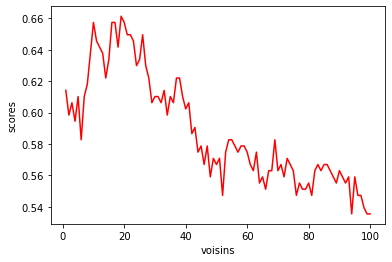

In [27]:
n = range(1,len(scores)+1)
plt.plot(n,scores,'r')
plt.xlabel("voisins")
plt.ylabel("scores")
plt.show()

In [28]:
scores.index(max(scores))

18

Le meilleur k est donc 19 qui est à l'indice 18 dans la liste scores.

In [29]:
knn_modele = KNeighborsClassifier(19)
knn_modele.fit(data_train,target_train)
knn_prediction = knn_modele.predict(data_test)
print(f"Score de train : {knn_modele.score(data_train,target_train)}")
print(f"Score de test : {knn_modele.score(data_test,target_test)}") 

Score de train : 0.7043918918918919
Score de test : 0.6614173228346457


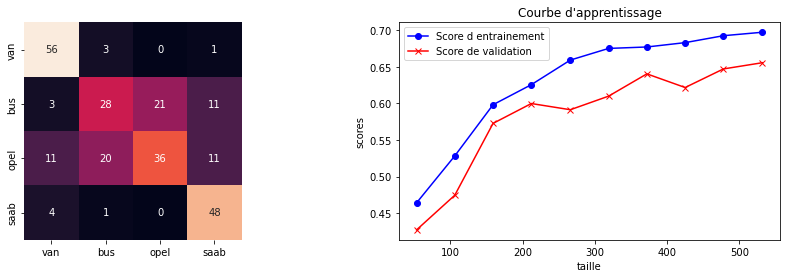

In [30]:
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.heatmap(confusion_matrix(target_test, knn_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])


n, train_scores, val_scores = learning_curve(knn_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n, train_scores.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n, val_scores.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
plt.legend()
plt.show()

Le modèle classe presque bien les van et saab mais fait beaucoup d'erreurs sur les deux autres.

On voit que les deux scores sont croissants en fonction de la taille. Donc plus on aura de données, plus le score sera meilleur.

- **Régression logistique**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr_modele = LogisticRegression(random_state=0)
lr_modele.fit(data_train,target_train)

lr_prediction = lr_modele.predict(data_test)
print(f"Score de train : {lr_modele.score(data_train,target_train)}")
print(f"Score de test : {lr_modele.score(data_test,target_test)}")

Score de train : 0.6199324324324325
Score de test : 0.6377952755905512


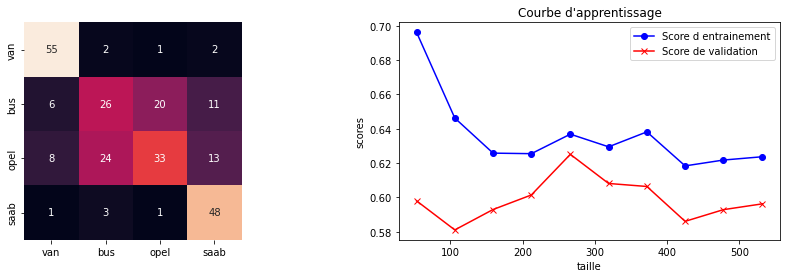

In [33]:
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.heatmap(confusion_matrix(target_test, lr_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])


n, train_scores, val_scores = learning_curve(lr_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n, train_scores.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n, val_scores.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
plt.legend()
plt.show()

Ainsi, on voit que plus de données n'améliorera pas notre modèle.

- **LDA et QDA**

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [35]:
modele1 = LinearDiscriminantAnalysis()
modele2 = QuadraticDiscriminantAnalysis()
modele1.fit(data_train,target_train)
modele2.fit(data_train,target_train)

prediction1 = modele1.predict(data_test)
prediction2 = modele2.predict(data_test)
print("LDA :")
print(f"Score de train : {modele1.score(data_train,target_train)}")
print(f"Score de test : {modele1.score(data_test,target_test)}")
print("QDA :")
print(f"Score de train : {modele2.score(data_train,target_train)}")
print(f"Score de test : {modele2.score(data_test,target_test)}")

LDA :
Score de train : 0.6621621621621622
Score de test : 0.6811023622047244
QDA :
Score de train : 0.7297297297297297
Score de test : 0.6692913385826772


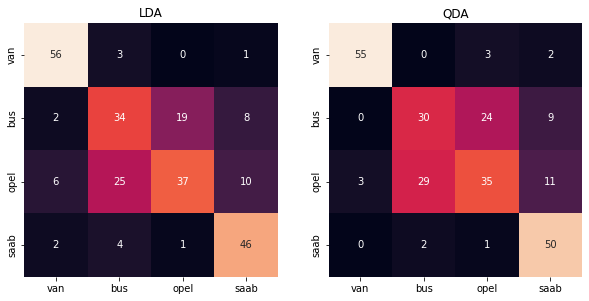

In [36]:
fig, ax = plt.subplots(1,2,figsize = (10,10))
sns.heatmap(confusion_matrix(target_test, prediction1), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])
ax[0].set_title("LDA")

sns.heatmap(confusion_matrix(target_test, prediction2), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[1])
ax[1].set_title("QDA")

plt.show()

LDA fait 4 erreurs dans la classification des van tandis que QDA en fait 5 et QDA fait 3 erreurs dans la classification des saab alors que LDA en fait 7.

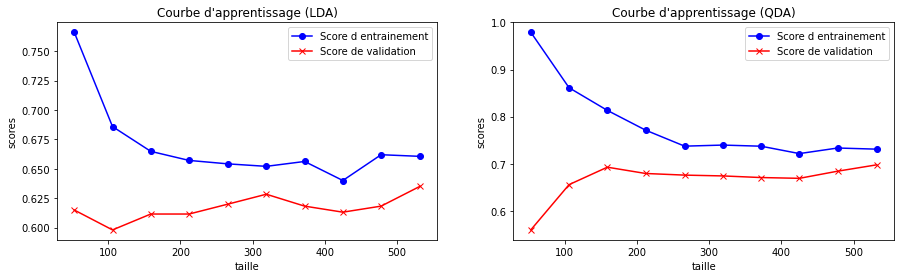

In [37]:
fig, ax = plt.subplots(1,2,figsize = (15,4))

n1, train_scores1, val_scores1 = learning_curve(modele1, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[0].plot(n1, train_scores1.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[0].plot(n1, val_scores1.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[0].set_title("Courbe d'apprentissage (LDA)")
ax[0].set_xlabel("taille")
ax[0].set_ylabel("scores")
ax[0].legend()

n2, train_scores2, val_scores2 = learning_curve(modele2, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n2, train_scores2.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n2, val_scores2.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage (QDA)")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
ax[1].legend()

plt.show()

Dans les deux cas, on remarque un score d'entrainement qui decroît puis commence à stagner et un score de validation qui croît et commence à stagner.

- **SVM**

Nous allons utiliser différents noyaux afin de connaître le cas qui fonctionne le mieux avec notre problème.

In [38]:
from sklearn.svm import SVC

In [39]:
rbf_modele = SVC(kernel='rbf',random_state=0)
sig_modele = SVC(kernel='sigmoid',random_state=0)


rbf_modele.fit(data_train,target_train)
sig_modele.fit(data_train,target_train)

rbf_prediction = rbf_modele.predict(data_test)
sig_prediction = sig_modele.predict(data_test)

print("Noyau gaussien :")
print(f"Score de train : {rbf_modele.score(data_train,target_train)}")
print(f"Score de test : {rbf_modele.score(data_test,target_test)}")
print("Noyau sigmoide :")
print(f"Score de train : {sig_modele.score(data_train,target_train)}")
print(f"Score de test : {sig_modele.score(data_test,target_test)}")

Noyau gaussien :
Score de train : 0.6790540540540541
Score de test : 0.6299212598425197
Noyau sigmoide :
Score de train : 0.4172297297297297
Score de test : 0.4330708661417323


Pour le noyau polynôme, on va rechercher le meilleur degré du polynôme.

In [40]:
from sklearn.model_selection import GridSearchCV

pol_modele = SVC(random_state=0)
parametre = {'kernel' : ['poly'],'degree' : [1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(pol_modele,parametre,cv=10)
grid.fit(data_train,target_train)

print(f"Le meilleur paramètre est : {grid.best_params_}")

Le meilleur paramètre est : {'degree': 1, 'kernel': 'poly'}


In [42]:
pol_modele = SVC(kernel = 'poly', degree = 1, random_state = 0)
pol_modele.fit(data_train,target_train)
pol_prediction = pol_modele.predict(data_test)

print("Noyau polynomiale :")
print(f"Score de train : {pol_modele.score(data_train,target_train)}")
print(f"Score de test : {pol_modele.score(data_test,target_test)}")

Noyau polynomiale :
Score de train : 0.6300675675675675
Score de test : 0.6181102362204725


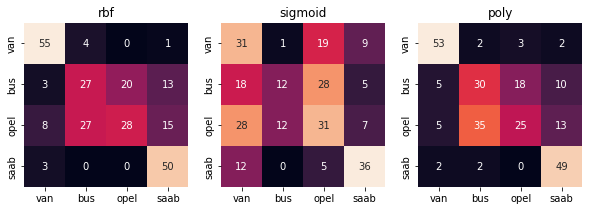

In [43]:
fig, ax = plt.subplots(1,3,figsize = (10,10))
sns.heatmap(confusion_matrix(target_test, rbf_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])

ax[0].set_title("rbf")


sns.heatmap(confusion_matrix(target_test, sig_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[1])

ax[1].set_title("sigmoid")

sns.heatmap(confusion_matrix(target_test, pol_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[2])

ax[2].set_title("poly")

plt.show()

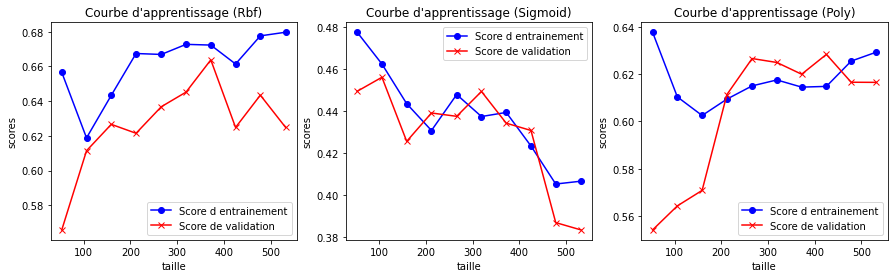

In [44]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1,3,figsize = (15,4))

n1, train_scores1, val_scores1 = learning_curve(rbf_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[0].plot(n1, train_scores1.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[0].plot(n1, val_scores1.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[0].set_title("Courbe d'apprentissage (Rbf)")
ax[0].set_xlabel("taille")
ax[0].set_ylabel("scores")
ax[0].legend()

n2, train_scores2, val_scores2 = learning_curve(sig_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n2, train_scores2.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n2, val_scores2.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage (Sigmoid)")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
ax[1].legend()

n3, train_scores3, val_scores3 = learning_curve(pol_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[2].plot(n3, train_scores3.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[2].plot(n3, val_scores3.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[2].set_title("Courbe d'apprentissage (Poly)")
ax[2].set_xlabel("taille")
ax[2].set_ylabel("scores")
ax[2].legend()

plt.show()

Le modèle sigmoid continue d'être en sous-apprentissage en fonction de la taille.

Pour le cas rbf et poly, les scores de validation sont croissants jusqu'à un certain rang, puis décroît après.

- **Arbre de décision**

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree_modele = DecisionTreeClassifier(random_state=0)
tree_modele.fit(data_train,target_train)

tree_prediction = tree_modele.predict(data_test)
print(f"Score de train : {tree_modele.score(data_train,target_train)}")
print(f"Score de test : {tree_modele.score(data_test,target_test)}")

Score de train : 1.0
Score de test : 0.6535433070866141


on est en situation de sur-apprentissage avec un score de 100% sur les données d'entrainement et 65% sur les données de test.

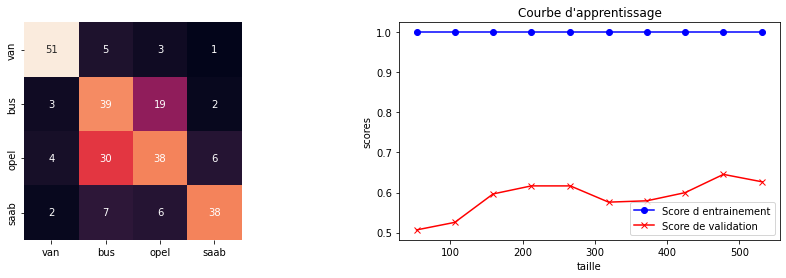

In [47]:
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.heatmap(confusion_matrix(target_test, tree_prediction), square=True, annot=True, cbar=False
            , xticklabels=['van','bus','opel','saab']
            , yticklabels=['van','bus','opel','saab'],ax=ax[0])

n, train_scores, val_scores = learning_curve(tree_modele, data_train,target_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,random_state=0)
ax[1].plot(n, train_scores.mean(axis=1), color='blue', marker='o',label='Score d entrainement')
ax[1].plot(n, val_scores.mean(axis=1), color='red', marker='x',label='Score de validation')
ax[1].set_title("Courbe d'apprentissage")
ax[1].set_xlabel("taille")
ax[1].set_ylabel("scores")
plt.legend()
plt.show()

En resumé : 

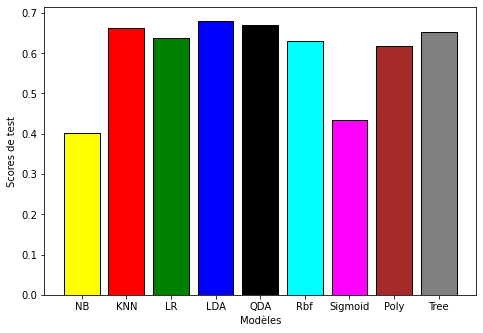

In [48]:
from matplotlib import pyplot

s1 = nb_modele.score(data_test,target_test)
s2 = knn_modele.score(data_test,target_test)
s3 = lr_modele.score(data_test,target_test)
s4 = modele1.score(data_test,target_test)
s5 = modele2.score(data_test,target_test)
s6 = rbf_modele.score(data_test,target_test)
s7 = sig_modele.score(data_test,target_test)
s8 = pol_modele.score(data_test,target_test)
s9 = tree_modele.score(data_test,target_test)
s = [s1,s2,s3,s4,s5,s6,s7,s8,s9]

fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.bar(['NB','KNN','LR','LDA','QDA','Rbf','Sigmoid','Poly', 'Tree'],s,color = ['yellow','red','green','blue','black','cyan','magenta','brown','grey'],edgecolor='black')

plt.ylabel('Scores de test') 
plt.xlabel('Modèles')

plt.show()

## **Par Cross-Validation**

In [49]:
from sklearn.model_selection import cross_validate

On fait une cross-validation sur nos données d'entraînement.

In [50]:
TEST = {}

- **Naive Bayes**

In [51]:
cv_nb_modele = GaussianNB()
resultat = cross_validate(cv_nb_modele,data_train,target_train,cv=10,return_estimator = True,return_train_score=True) # le nombre de partition est 10
resultat['test_score']

array([0.4       , 0.4       , 0.3220339 , 0.45762712, 0.37288136,
       0.38983051, 0.3220339 , 0.40677966, 0.42372881, 0.44067797])

On remarque qu'aucun score n'atteint au moins les 50%

In [54]:
# En moyenne, nous avons
resultat['test_score'].mean()

0.3935593220338983

In [55]:
test_scores = np.zeros(10)
for k in range(10):
    test_scores[k] = resultat['estimator'][k].score(data_test,target_test)
TEST[cv_nb_modele.__class__.__name__] = test_scores
test_scores.mean()

0.4047244094488189

Le score moyen est très mauvais sur les données de test.

- **Méthode du plus proche voisin**

On cherche le meilleur k.

In [56]:
moy_scores = []

for k in range(1,101):
    modele = KNeighborsClassifier(k)
    resultat = cross_validate(modele,data_train,target_train,cv=10)
    moy_scores.append(resultat['test_score'].mean())

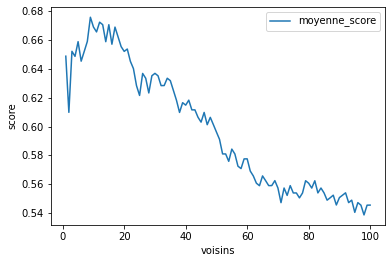

In [57]:
n = range(1,len(moy_scores)+1)
plt.plot(n,moy_scores,label='moyenne_score')
plt.xlabel("voisins")
plt.ylabel("score")
plt.legend()
plt.show()

In [58]:
moy_scores.index(max(moy_scores))

8

L'entier qui donne le meilleur score à l'indice 8 est 9 et ce score vaut : 

In [59]:
moy_scores[8]

0.6757909604519774

In [60]:
cv_knn_modele = KNeighborsClassifier(9)
resultat = cross_validate(cv_knn_modele,data_train,target_train,cv=10,return_estimator = True)
resultat['test_score']

array([0.61666667, 0.66666667, 0.6779661 , 0.6779661 , 0.74576271,
       0.71186441, 0.59322034, 0.66101695, 0.66101695, 0.74576271])

In [61]:
# En moyenne, nous avons
resultat['test_score'].mean()

0.6757909604519774

In [62]:
test_scores = np.zeros(10)
for k in range(10):
    test_scores[k] = resultat['estimator'][k].score(data_test,target_test)
TEST[cv_knn_modele.__class__.__name__] = test_scores
test_scores.mean()

0.6448818897637795

Sur les données d'entrainement ou de test, le score est largement meilleur dans le plus proche voisin que dans la méthode du naive Bayes.

- **Régression logistique**

In [63]:
cv_lr_modele = LogisticRegression(random_state=0)
resultat = cross_validate(cv_lr_modele,data_train,target_train,cv=10,return_estimator = True)
resultat['test_score']

array([0.61666667, 0.6       , 0.55932203, 0.69491525, 0.49152542,
       0.6440678 , 0.52542373, 0.59322034, 0.66101695, 0.57627119])

In [64]:
# En moyenne, nous avons
resultat['test_score'].mean()

0.5962429378531074

In [65]:
test_scores = np.zeros(10)
for k in range(10):
    test_scores[k] = resultat['estimator'][k].score(data_test,target_test)
TEST[cv_lr_modele.__class__.__name__] = test_scores
test_scores.mean()

0.6326771653543306

On remarque que le KNN est meilleur que la regression logistique sur les données d'entrainement et de test.

- **LDA et QDA**

In [66]:
cv_modele1 = LinearDiscriminantAnalysis()
cv_modele2 = QuadraticDiscriminantAnalysis()
resultat1 = cross_validate(cv_modele1,data_train,target_train,cv=10,return_estimator = True)
resultat2 = cross_validate(cv_modele2,data_train,target_train,cv=10,return_estimator = True)
print(f"Les scores par LDA :  {resultat1['test_score']}")
print(f"Les scores par QDA :  {resultat2['test_score']}")

Les scores par LDA :  [0.63333333 0.65       0.57627119 0.6779661  0.50847458 0.76271186
 0.57627119 0.62711864 0.71186441 0.62711864]
Les scores par QDA :  [0.65       0.81666667 0.69491525 0.66101695 0.66101695 0.76271186
 0.61016949 0.71186441 0.71186441 0.69491525]


In [371]:
# En moyenne, nous avons
print(f"Moyenne par LDA :  {resultat1['test_score'].mean()}")
print(f"Moyenne par QDA :  {resultat2['test_score'].mean()}")

Moyenne par LDA :  0.6351129943502825
Moyenne par QDA :  0.6975141242937852


In [372]:
test_scores1 = np.zeros(10)
test_scores2 = np.zeros(10)
for k in range(10):
    test_scores1[k] = resultat1['estimator'][k].score(data_test,target_test)
    test_scores2[k] = resultat2['estimator'][k].score(data_test,target_test)
TEST[cv_modele1.__class__.__name__] = test_scores1
TEST[cv_modele2.__class__.__name__] = test_scores2
print(f"Moyenne par LDA : {test_scores1.mean()}")
print(f"Moyenne par QDA : {test_scores2.mean()}")

Moyenne par LDA : 0.6716535433070865
Moyenne par QDA : 0.6688976377952756


Sur les données de test, LDA et QDA font largement mieux que tous les autres modèles précédents.

- **SVM**

In [373]:
cv_rbf_modele = SVC(kernel='rbf',random_state=0)
cv_sig_modele = SVC(kernel='sigmoid',random_state=0)
cv_pol_modele = SVC(kernel='poly',degree = 1,random_state=0)
resultat1 = cross_validate(cv_rbf_modele,data_train,target_train,cv=10,return_estimator = True)
resultat2 = cross_validate(cv_sig_modele,data_train,target_train,cv=10,return_estimator = True)
resultat3 = cross_validate(cv_pol_modele,data_train,target_train,cv=10,return_estimator = True)
print(f"Les scores avec noyau gaussien :  {resultat1['test_score']}")
print(f"Les scores avec noyau sigmoide :  {resultat2['test_score']}")
print(f"Les scores avec noyau polynôme :  {resultat3['test_score']}")

Les scores avec noyau gaussien :  [0.58333333 0.7        0.61016949 0.6440678  0.55932203 0.62711864
 0.57627119 0.59322034 0.71186441 0.6440678 ]
Les scores avec noyau sigmoide :  [0.41666667 0.36666667 0.38983051 0.3220339  0.27118644 0.3559322
 0.37288136 0.52542373 0.45762712 0.3559322 ]
Les scores avec noyau polynôme :  [0.6        0.65       0.57627119 0.71186441 0.52542373 0.62711864
 0.52542373 0.61016949 0.69491525 0.6440678 ]


In [374]:
# En moyenne, nous avons
print(f"Moyenne avec noyau gaussien :  {resultat1['test_score'].mean()}")
print(f"Moyenne avec noyau sigmoide :  {resultat2['test_score'].mean()}")
print(f"Moyenne avec noyau polynôme :  {resultat3['test_score'].mean()}")

Moyenne avec noyau gaussien :  0.6249435028248588
Moyenne avec noyau sigmoide :  0.3834180790960452
Moyenne avec noyau polynôme :  0.6165254237288136


Le noyau sigmoide est très mauvais avec des résultats moins que ceux du naive Bayes sur les données d'entrainement.

Le noyau gaussien et polynôme font moins que LDA, QDA sur les mêmes données.

In [375]:
test_scores1 = np.zeros(10)
test_scores2 = np.zeros(10)
test_scores3 = np.zeros(10)
for k in range(10):
    test_scores1[k] = resultat1['estimator'][k].score(data_test,target_test)
    test_scores2[k] = resultat2['estimator'][k].score(data_test,target_test)
    test_scores3[k] = resultat3['estimator'][k].score(data_test,target_test)
TEST["SVM_rbf"] = test_scores1
TEST["SVM_sigmoid"] = test_scores2
TEST["SVM_poly"] = test_scores3
print(f"Moyenne avec noyau gaussien : {test_scores1.mean()}")
print(f"Moyenne avec noyau sigmoide : {test_scores2.mean()}")
print(f"Moyenne avec noyau polynôme : {test_scores3.mean()}")

Moyenne avec noyau gaussien : 0.629527559055118
Moyenne avec noyau sigmoide : 0.43582677165354333
Moyenne avec noyau polynôme : 0.6035433070866142


Sur les données de test :
    
Regression logistique, KNN, LDA et QDA sont mieux que le SVM à noyau gaussien.

Le SVM à noyau sigmoide est un tout petit peu meilleur que le naive Bayes.

- **Arbre de décision**

In [376]:
cv_tree_modele = DecisionTreeClassifier(random_state=0)
resultat = cross_validate(cv_tree_modele,data_train,target_train,cv=10,return_estimator = True)
resultat['test_score']

array([0.65      , 0.6       , 0.55932203, 0.66101695, 0.66101695,
       0.66101695, 0.47457627, 0.6779661 , 0.66101695, 0.66101695])

In [377]:
# La moyenne donne
resultat['test_score'].mean()

0.6266949152542373

In [378]:
test_scores = np.zeros(10)
for k in range(10):
    test_scores[k] = resultat['estimator'][k].score(data_test,target_test)
TEST[cv_tree_modele.__class__.__name__] = test_scores
test_scores.mean()

0.6153543307086614

Sur les données de test, le score est moins bon. 

Ce phénomème est normal car on sait que la technique par arbre de décision est sensible à l'overfitting.

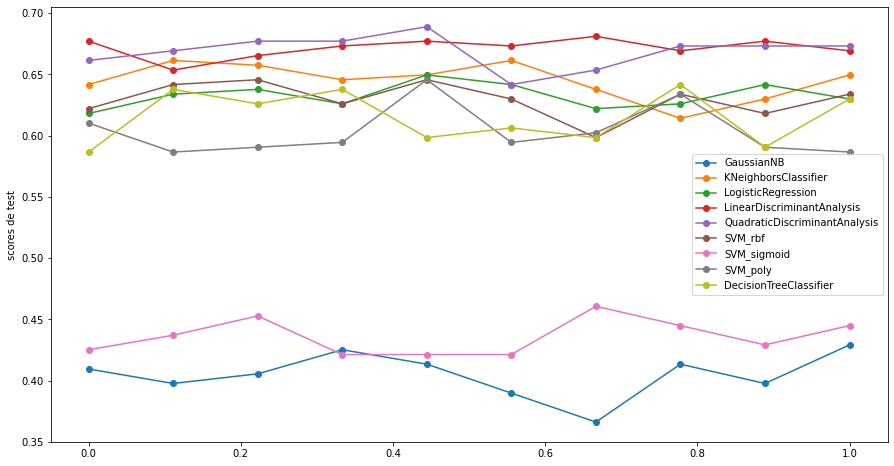

In [379]:
plt.figure(figsize=(15, 8))
x = np.linspace(0, 1, 10)
for cle, valeur in TEST.items():
        plt.plot(x,valeur,'o-',label=cle)
#plt.xlabel("voisins")
plt.ylabel("scores de test")
plt.legend()
plt.show()

## **Méthodes ensemblistes**

In [381]:
from sklearn.model_selection import GridSearchCV

### **Bagging**

In [68]:
from sklearn.ensemble import BaggingClassifier

On choisit comme estimateur, le modèle qui a donné le meilleur score par train/test et par cross validation.

In [69]:
estimateur = LinearDiscriminantAnalysis()
modele = BaggingClassifier(base_estimator = estimateur,random_state=0)
parametre = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100]}
grid = GridSearchCV(modele,parametre)
grid.fit(data_train,target_train)

print(f"Le meilleur paramètre est : {grid.best_params_} de score : {grid.best_score_}")

Le meilleur paramètre est : {'n_estimators': 80} de score : 0.6266201395812562


In [70]:
modele = BaggingClassifier(base_estimator = estimateur,n_estimators = 80,random_state=0)
modele.fit(data_train,target_train)
print(f"Score de train : {modele.score(data_train,target_train)}")
print(f"Score de test : {modele.score(data_test,target_test)}")

Score de train : 0.6739864864864865
Score de test : 0.6732283464566929


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
modele = RandomForestClassifier(random_state=0)
parametre = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(modele,parametre)
grid.fit(data_train,target_train)

print(f"Le meilleur paramètre est : {grid.best_params_} de score : {grid.best_score_}")

Le meilleur paramètre est : {'max_depth': 7, 'n_estimators': 50} de score : 0.7027061672126477


In [85]:
modele = RandomForestClassifier(n_estimators = 50, max_depth= 7, random_state=0)
modele.fit(data_train,target_train)
print(f"Score de train : {modele.score(data_train,target_train)}")
print(f"Score de test : {modele.score(data_test,target_test)}")

Score de train : 0.8851351351351351
Score de test : 0.6181102362204725


### **Boosting**

In [75]:
from sklearn.ensemble import AdaBoostClassifier


In [77]:
modele = AdaBoostClassifier(random_state=0)
parametre = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100]}
grid = GridSearchCV(modele,parametre)
grid.fit(data_train,target_train)

print(f"Le meilleur paramètre est : {grid.best_params_} de score : {grid.best_score_}")

Le meilleur paramètre est : {'n_estimators': 30} de score : 0.5202107961828799


In [78]:
modele = AdaBoostClassifier(n_estimators = 30,random_state=0)
modele.fit(data_train,target_train)
print(f"Score de train : {modele.score(data_train,target_train)}")
print(f"Score de test : {modele.score(data_test,target_test)}")

Score de train : 0.5202702702702703
Score de test : 0.4881889763779528


In [80]:
from sklearn.ensemble import GradientBoostingClassifier


In [82]:
modele = GradientBoostingClassifier(random_state=0)
parametre = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100]}
grid = GridSearchCV(modele,parametre)
grid.fit(data_train,target_train)

print(f"Le meilleur paramètre est : {grid.best_params_} de score : {grid.best_score_}")

Le meilleur paramètre est : {'n_estimators': 20} de score : 0.6773394103404073


In [83]:
modele = GradientBoostingClassifier(n_estimators = 20,random_state=0)
modele.fit(data_train,target_train)
print(f"Score de train : {modele.score(data_train,target_train)}")
print(f"Score de test : {modele.score(data_test,target_test)}")

Score de train : 0.7989864864864865
Score de test : 0.6299212598425197


#  <a name="C1">Test de modèles d'apprentissage non surpervisée</a>

Nous allons oublier la variable à expliquer et essayer de voir si on peut former des groupes qu'avec nos variables explicatives.

### **KMeans**

On va d'abord chercher le meilleur nombre de clusters en traçant la fonction coude (ou méthode Elbow).

In [114]:
from sklearn.cluster import KMeans

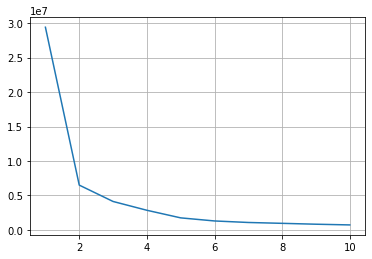

In [116]:
t = []
for i in range(1,11):
    model = KMeans(i)
    model.fit(data)
    t.append(model.inertia_)
plt.plot(range(1,11),t)
plt.grid()
plt.show()



On voit que le nombre optimal est 3. Ce n'est pas surprénant car d'après l'ACP, une groupe de 4 était quasi imposible et d'après nos différents modèles précédents, on voyait que nos modèles avaient du mal à bien classer les véhicules de type opel et bus.

In [134]:
modele = KMeans(n_clusters=3)
modele.fit(data)


KMeans(n_clusters=3)

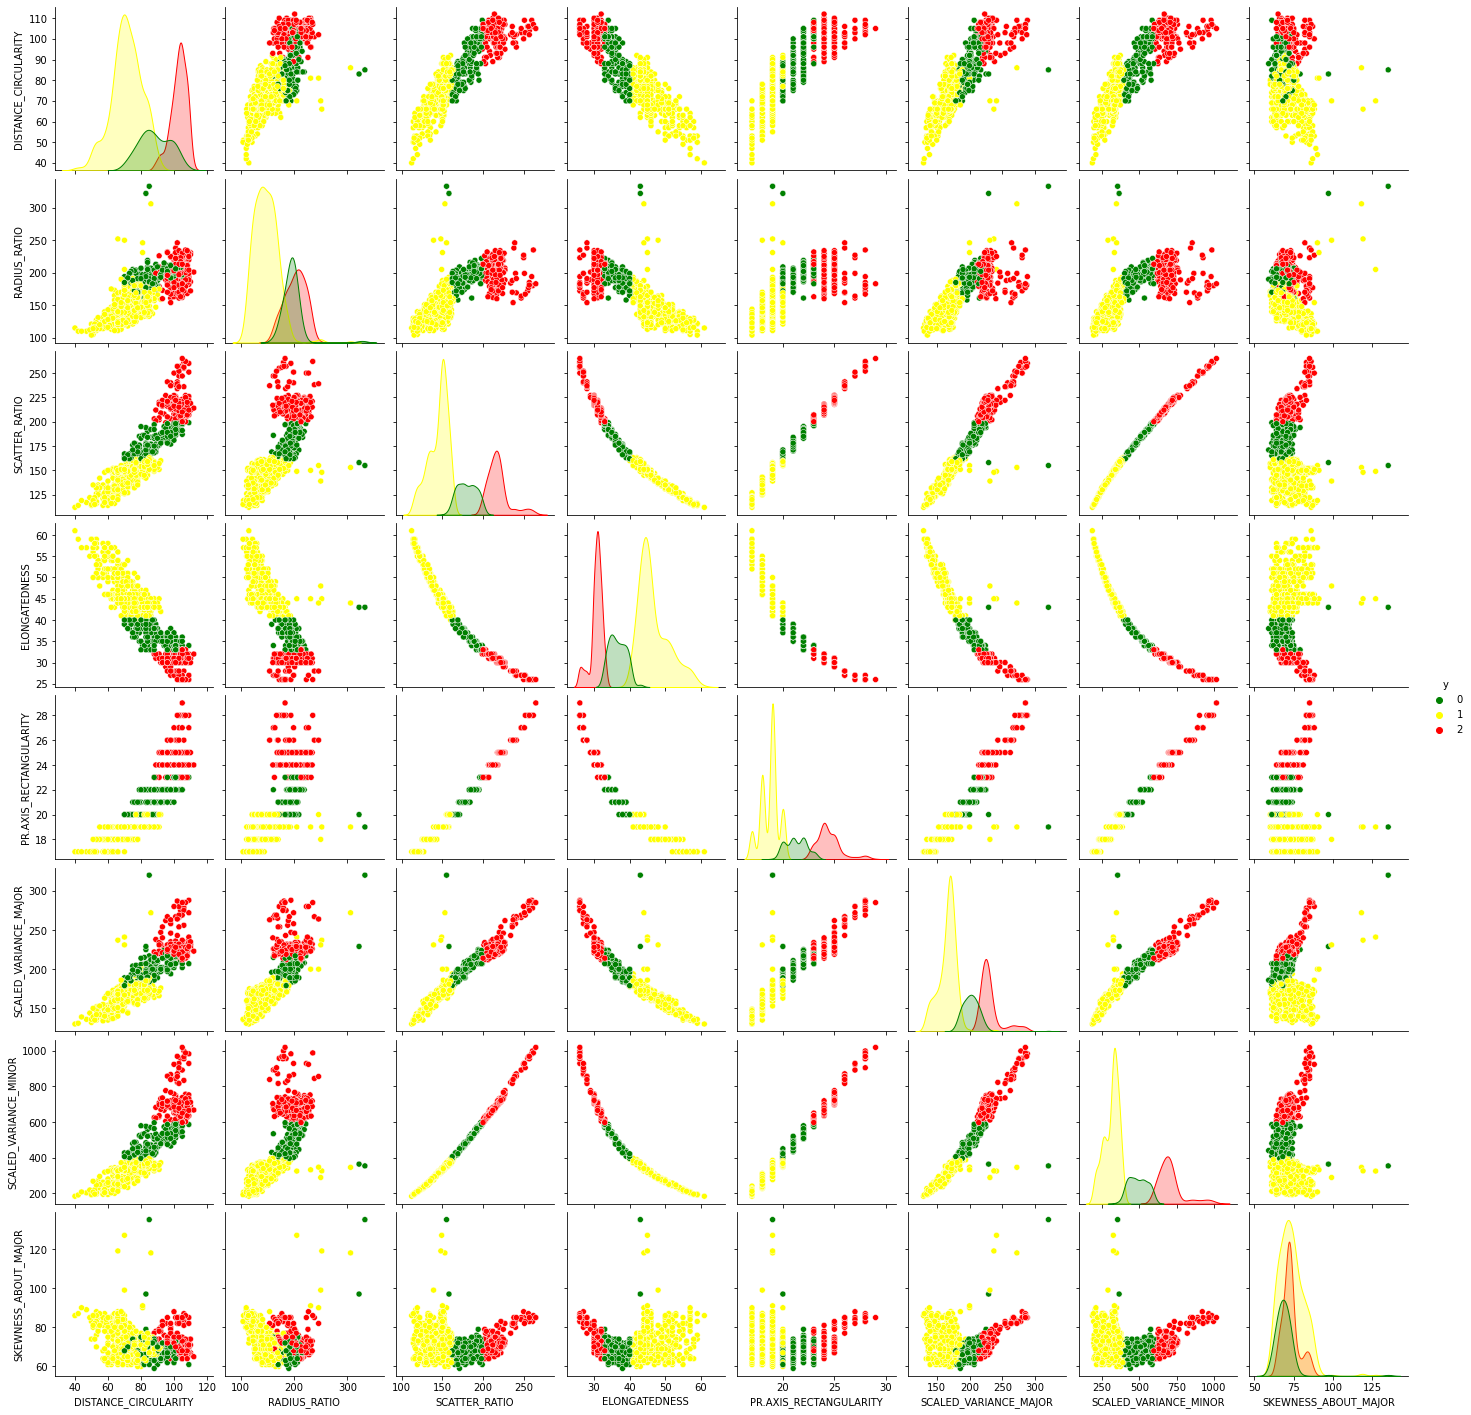

In [135]:
d = data.copy()
d['y'] = modele.labels_
_ = sns.pairplot(d,hue = 'y',palette={0:'green',1:'yellow',2:'red'})


### **Classification hiérarchique**

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage

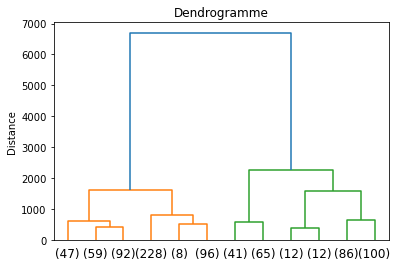

In [142]:
d = linkage(data,method="ward")

_ = dendrogram(d, p=12, truncate_mode="lastp")

plt.title("Dendrogramme")
plt.ylabel("Distance")
plt.show()

#  <a name="C1">Conclusion</a>

On constate que :
    
Entraîner un modèle en faisant une cross-validation ne donne pas toujours des meilleurs scores, qu'entraîner un modèle avec juste une partition en données d'entrainement et de test. Cela dépendra donc de la configuration du dataset. Néanmoins, il faut souligner que la cross-validation a réduit le sur-apprentissage dans la plupart des cas.

Sur notre meilleur estimateur (LDA), le Bagging a réduit considérablement la variance. 

RandomForest a bien réduit le problème de sur-apprentissage des données d'entraînement, mais ne donne pas de meilleurs scores que le bagging. Cela peut être du au fait que l'arbre de décision (l'estimateur utilisé par le RandomForest) n'est pas le meilleur estimateur sur notre jeu de données.

AdaBoost est moins bon sur nos données contrairement au GradientBoosting qui réduit le biais mais sur-apprend un peu.

On peut aussi dire qu'utiliser une ACP (technique qui n'utilise en aucun moment les variables à expliquer) est un bon moyen pour visualiser ces données afin de se faire une première idée avant d'entraîner des modèles de Machine Learning.